# Import all libraries and packages

In [1]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lonewolf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

# Load dataset

In [17]:
data=pd.read_csv('twitter.csv',usecols=['label','tweet'])[['tweet','label']]

In [18]:
data.head()

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


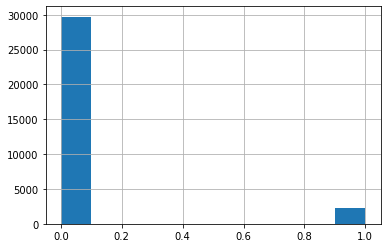

In [19]:
data['label'].hist()

In [20]:
from nltk import word_tokenize
#for i in range(0,):
tweet_tokens=word_tokenize(data['tweet'][0])
print(tweet_tokens)
    

['@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#', 'run']


In [21]:
def preprocessing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub('[^a-z]', ' ',tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    stop_words = stopwords.words('english')
    stop_words.remove('not')
    tweet = [ps.stem(word) for word in tweet if not word in set(stop_words)]
    tweet = ' '.join(tweet)
    return tweet

In [22]:
print(preprocessing(data['tweet'][0]))

father dysfunct selfish drag kid dysfunct run


In [23]:
length = len(data['tweet'])
vocabulary = ''
negative_vocabulary = ''
positive_vocabulary = ''
corpus = []
for i in range(0,5000):
    tweet = preprocessing(data['tweet'][i])
    corpus.append(tweet)
    vocabulary = vocabulary+ ' ' + tweet
    if data['label'][i] == 1:
        negative_vocabulary = negative_vocabulary+ ' ' + tweet
    else:
        positive_vocabulary = positive_vocabulary+ ' ' + tweet

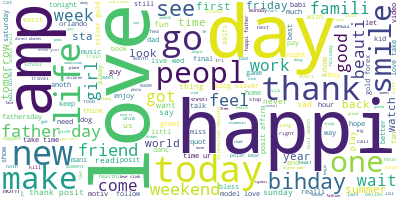

In [44]:
cloud=WordCloud(background_color="white")
cloud.generate(positive_vocabulary)
cloud.to_image()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
y = data.iloc[:5000, 1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

Classifier:  Logistic Regression

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       977
           1       0.25      0.83      0.38        23

    accuracy                           0.94      1000
   macro avg       0.62      0.88      0.67      1000
weighted avg       0.98      0.94      0.95      1000



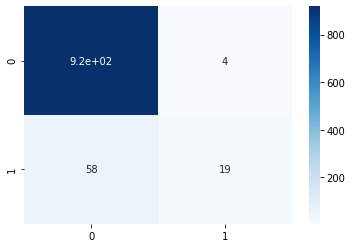

Classifier:  Multinomial Naive Bayes

               precision    recall  f1-score   support

           0       0.96      0.95      0.96       931
           1       0.42      0.46      0.44        69

    accuracy                           0.92      1000
   macro avg       0.69      0.71      0.70      1000
weighted avg       0.92      0.92      0.92      1000



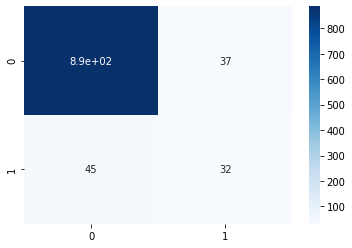

Classifier:  Decision Tree Classifier

               precision    recall  f1-score   support

           0       0.96      0.96      0.96       928
           1       0.51      0.54      0.52        72

    accuracy                           0.93      1000
   macro avg       0.74      0.75      0.74      1000
weighted avg       0.93      0.93      0.93      1000



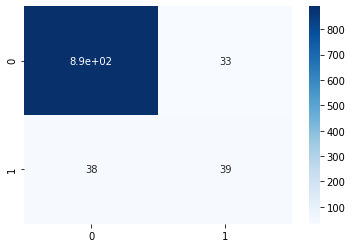

Classifier:  Support Vector Classifier

               precision    recall  f1-score   support

           0       0.99      0.95      0.97       957
           1       0.40      0.72      0.52        43

    accuracy                           0.94      1000
   macro avg       0.69      0.84      0.74      1000
weighted avg       0.96      0.94      0.95      1000



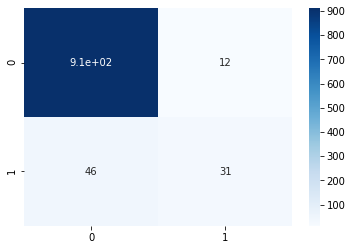

In [46]:
def classifier(clf,classifier_type):
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    print("Classifier: ",classifier_type)
    print("\n",classification_report(predictions,y_test))
    
    cm=confusion_matrix(y_test,predictions)
    fig=sns.heatmap(cm,annot=True,cmap='Blues')
    plt.show()
    accuracy[classifier_type]=accuracy_score(y_test,predictions)
    
accuracy={}
classifier(LogisticRegression(),"Logistic Regression")
classifier(MultinomialNB(),"Multinomial Naive Bayes")
classifier(DecisionTreeClassifier(),"Decision Tree Classifier")
classifier(SVC(kernel="linear"),"Support Vector Classifier")

dict_items([('Logistic Regression', 0.938), ('Multinomial Naive Bayes', 0.918), ('Decision Tree Classifier', 0.935), ('Support Vector Classifier', 0.942)])


([<matplotlib.axis.XTick at 0x7f40339b2a30>,
 [Text(0, 0, 'Logistic Regression'),
  Text(0, 0, 'Multinomial Naive Bayes'),
  Text(0, 0, 'Decision Tree Classifier'),
  Text(0, 0, 'Support Vector Classifier')])

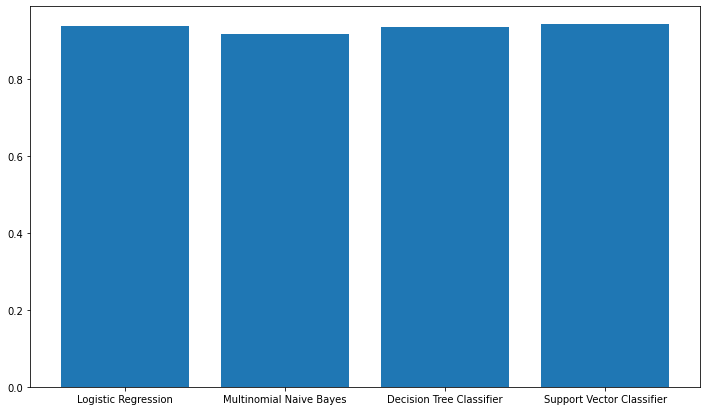

In [42]:
print(accuracy.items())
plt.figure(figsize=(12,7))
plt.bar(range(len(accuracy)), list(accuracy.values()), align='center')
plt.xticks(range(len(accuracy)), list(accuracy.keys()))